In [1]:
from __future__ import annotations

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.datasets._samples_generator import make_blobs
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
def prepare_data() -> None :
    X, y = make_blobs(n_samples= 1000, n_features= 2, 
                     centers= 3, cluster_std=2, 
                     random_state=2)
    y = to_categorical(y)
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy


def fit_model(trainX, trainy, testX, testy, n_batch) -> None :
    optimizer = SGD(learning_rate = .01, momentum = .9)
    model = Sequential([Dense(50, input_dim = 2, 
                              activation = "relu", 
                              kernel_initializer= "he_uniform"),
                        Dense(3, activation="softmax")]) 
    
    model.compile(loss = "categorical_crossentropy", 
                 optimizer = optimizer, metrics = ["accuracy"])
    
    history = model.fit(trainX, trainy, 
                        validation_data = (testX, testy), 
                        epochs = 200, verbose = 0, 
                        batch_size = n_batch)
                        
    plt.plot(history.history["accuracy"], label='train', color = "plum")
    plt.plot(history.history["val_accuracy"], label='test', color = "skyblue")
    plt.title('batch='+str(n_batch), pad=-40)

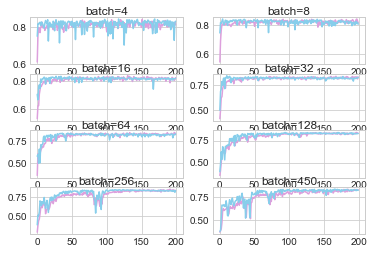

In [3]:
if __name__ == "__main__" :
    trainX, trainy, testX, testy = prepare_data()
    batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]
    # plt.figure(figsize = (10, 6), dpi = 80)
    for i in range(len(batch_sizes)) :
        plot_no = 420 + (i + 1)
        plt.subplot(plot_no)
        fit_model(trainX, trainy, testX, testy, batch_sizes[i])
    plt.show()